In [1]:
# 產生一個二維陣列，其中:  
#row方向為sin(theta) theta:0~720 deg,  d_theta=10 deg  
#col方向為cos(theta) theta:0~360 deg, d_theta=5 deg  
#矩陣內容則為對應之row(i_row)*col(i_col)

In [12]:
import math
import numpy as np
# 產生row方向之角度參考資料
the_row= np.arange(0,720,10)
the_row_rad=the_row * math.pi / 180
#產生col方向之角度參考資料
the_col=np.arange(0,360,5)
the_col_rad=the_col * math.pi / 180
# 產生row 方向之三角函數數值
val_row=[math.sin(val) for val in the_row_rad]
num_row=len(val_row)
# 產生col 方向之三角函數數值
val_col=[math.cos(val) for val in the_col_rad]
num_col=len(val_col)

print('size of matrix is: %d x %d' %(num_row,num_col))

size of matrix is: 72 x 72


In [5]:
# 利用矩陣運算產生矩陣
val_row=np.array(val_row)
val_col=np.array(val_col)
# row:72x1  col:1x72
# np.matmul 兩個矩陣相乘
matrix_1=np.matmul(np.reshape(val_row, (-1,1)), np.reshape(val_col, (1,-1)))

print(matrix_1.shape)

print(matrix_1)

(72, 72)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.17364818  0.17298739  0.17101007 ...  0.16773126  0.17101007
   0.17298739]
 [ 0.34202014  0.34071865  0.33682409 ...  0.33036609  0.33682409
   0.34071865]
 ...
 [-0.5        -0.49809735 -0.49240388 ... -0.48296291 -0.49240388
  -0.49809735]
 [-0.34202014 -0.34071865 -0.33682409 ... -0.33036609 -0.33682409
  -0.34071865]
 [-0.17364818 -0.17298739 -0.17101007 ... -0.16773126 -0.17101007
  -0.17298739]]


In [15]:
# 利用迴圈產生陣列
val_row=np.array(val_row)
val_col=np.array(val_col)

matrix_2=np.zeros((num_row, num_col))
#print(matrix_2)
for i_r in range(num_row):
    for i_c in range(num_col):
        matrix_2[i_r, i_c]= val_row[i_r] * val_col[i_c]
print(matrix_2)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.17364818  0.17298739  0.17101007 ...  0.16773126  0.17101007
   0.17298739]
 [ 0.34202014  0.34071865  0.33682409 ...  0.33036609  0.33682409
   0.34071865]
 ...
 [-0.5        -0.49809735 -0.49240388 ... -0.48296291 -0.49240388
  -0.49809735]
 [-0.34202014 -0.34071865 -0.33682409 ... -0.33036609 -0.33682409
  -0.34071865]
 [-0.17364818 -0.17298739 -0.17101007 ... -0.16773126 -0.17101007
  -0.17298739]]


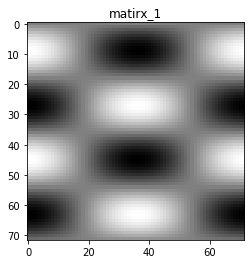

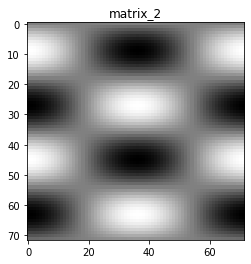

In [17]:
# 用matplot 繪製出2D
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(matrix_1, cmap='gray'), plt.title('matirx_1')

plt.figure()
plt.imshow(matrix_2, cmap='gray'), plt.title('matrix_2')

plt.show()

[[  0   5  10 ... 345 350 355]
 [  0   5  10 ... 345 350 355]
 [  0   5  10 ... 345 350 355]
 ...
 [  0   5  10 ... 345 350 355]
 [  0   5  10 ... 345 350 355]
 [  0   5  10 ... 345 350 355]]
----------------------------------
[[  0   0   0 ...   0   0   0]
 [ 10  10  10 ...  10  10  10]
 [ 20  20  20 ...  20  20  20]
 ...
 [690 690 690 ... 690 690 690]
 [700 700 700 ... 700 700 700]
 [710 710 710 ... 710 710 710]]


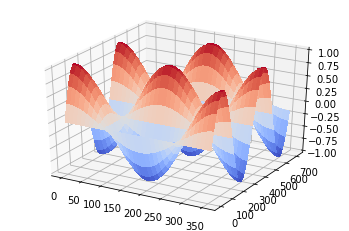

In [28]:
# 用matplot 繪製出3D
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm

fig=plt.figure()
ax=fig.gca(projection='3d')

X, Y =np.meshgrid(the_col, the_row)
Z=(matrix_1)

print(X) # 0~360
print('----------------------------------')
print(Y) # 0~720

# plot the surface
surf=ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)

In [29]:
# 製作成csv 格式檔案    sin跟cos的乘積表
import pandas as pd

data_surf=pd.DataFrame(data=matrix_1, columns=the_col, index=the_row)
data_surf.to_csv('sample folder\\test_sincos_plot.csv')

# 對矩陣內容作亮度標準化

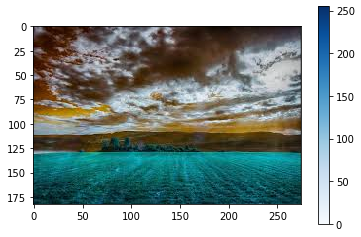

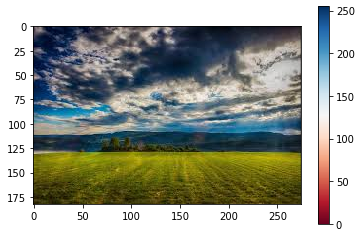

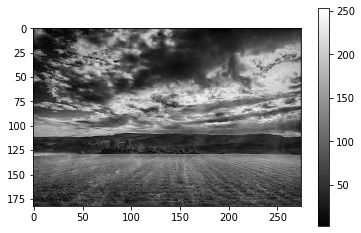

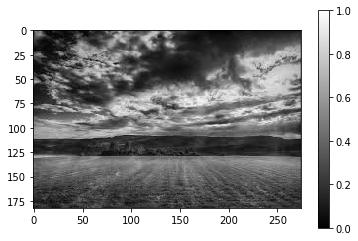

In [38]:
import cv2
import matplotlib.pylab as plt
import numpy as np

def func_Plot(img, cm='Blues'):
    fig=plt.figure()
#    ax=plt.imshow(img, cmap='gray')
    ax=plt.imshow(img, cmap=cm) # 把圖畫出來的function
    fig.colorbar(ax)
    
img_bgr=cv2.imread('sample folder\\view.jpg') # opencv的習慣 bgr
img_rgb=img_bgr[...,::-1] # 把第三行的順序反過來

func_Plot(img_bgr) # channel不對，電腦當作bgr，所以偏藍
func_Plot(img_rgb, cm='RdBu') # 調整channel的圖

# 影像灰階化 (rgb3個channel，比較難處理，所以才要灰階化)
img_gray=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

func_Plot(img_gray, cm='gray')
# intensity = (I-I_min) / (I_max - I_min)
img_gray_norm= (img_gray - np.min(img_gray)) / (np.max(img_gray) - np.min(img_gray)) # 標準化

func_Plot(img_gray_norm, cm='gray')

plt.show()

In [5]:
import numpy as np
import cv2
img=cv2.imread('open.png')
print(type(img))
print(img.shape)
# 圖檔格式 cv2.IMREAD_COLOR  IMREAD_GRAYSCALE  IMREAD_UNCHANGED
img_unchanged = cv2.imread('open.png', cv2.IMREAD_UNCHANGED) # 讀取照片中所有的channels

# 讓視窗可以自由縮放大小
cv2.namedWindow('open', cv2.WINDOW_NORMAL)


# 顯示圖片
cv2.imshow('open',img)
# 按下任意鍵，則關閉所有視窗
cv2.waitKey(0) #函數是用來等待與讀取使用者按下的按鍵
# cv2.destroyAllWindows()
cv2.destroyWindow('open') # 關閉特定視窗



<class 'numpy.ndarray'>
(249, 202, 3)
